<a href="https://colab.research.google.com/github/charurathour/Data-science-projects/blob/main/Kmeans_clustering_customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K Means clustering based Customer Segmenation
This notebook focuses on customer segmentation — a key application of unsupervised learning in business analytics. Using the K-Means clustering algorithm, we’ll group customers based on their purchasing behavior and demographic attributes. This helps businesses identify distinct customer segments and tailor marketing strategies accordingly.

We’ll preprocess the data, choose optimal cluster numbers, and visualize the resulting segments to gain insights into customer patterns.

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")

print("Path to dataset files:", path)

100%|██████████| 1.55k/1.55k [00:00<00:00, 1.77MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/versions/1


In [2]:
import os

dataset_path = "/root/.cache/kagglehub/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/versions/1"
print(os.listdir(dataset_path))

['Mall_Customers.csv']


In [3]:
import pandas as pd

df=pd.read_csv(dataset_path+'/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
df.rename(columns={'Annual Income (k$)':'Annual_Income','Spending Score (1-100)':'Spending_Score'},inplace=True)

In [9]:
df.head(2)

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

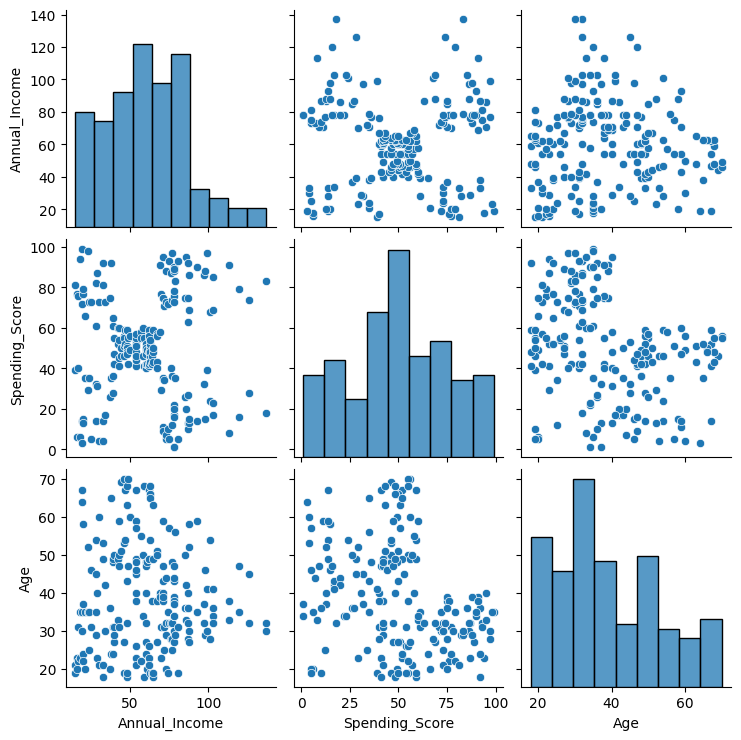

In [11]:
sns.pairplot(df[['Annual_Income','Spending_Score','Age']])

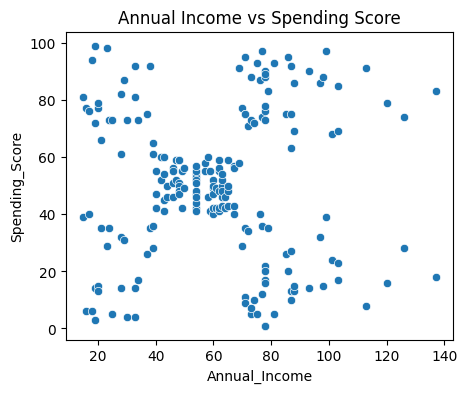

In [17]:
plt.figure(figsize=(5,4))
sns.scatterplot(df,x='Annual_Income',y='Spending_Score')
plt.title('Annual Income vs Spending Score')
plt.show()

We can observe 5 clusters here

In [18]:
from sklearn.cluster import KMeans

In [20]:
X=df[['Annual_Income','Spending_Score']]
wcss=[]

for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300, n_init=10, random_state=0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

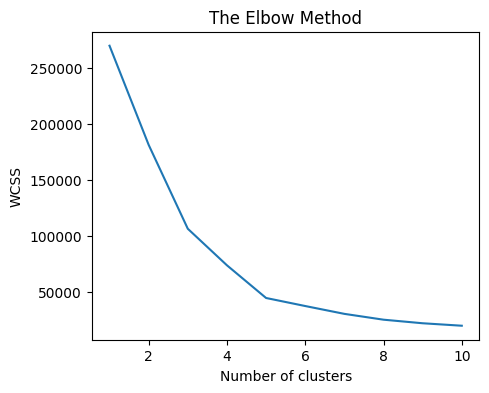

In [21]:
plt.figure(figsize=(5,4))
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [22]:
kmeans=KMeans(n_clusters=5,init='k-means++',max_iter=300, n_init=10, random_state=0)
y_kmeans=kmeans.fit_predict(X)

In [23]:
df['Cluster']=y_kmeans

In [24]:
df.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score,Cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3


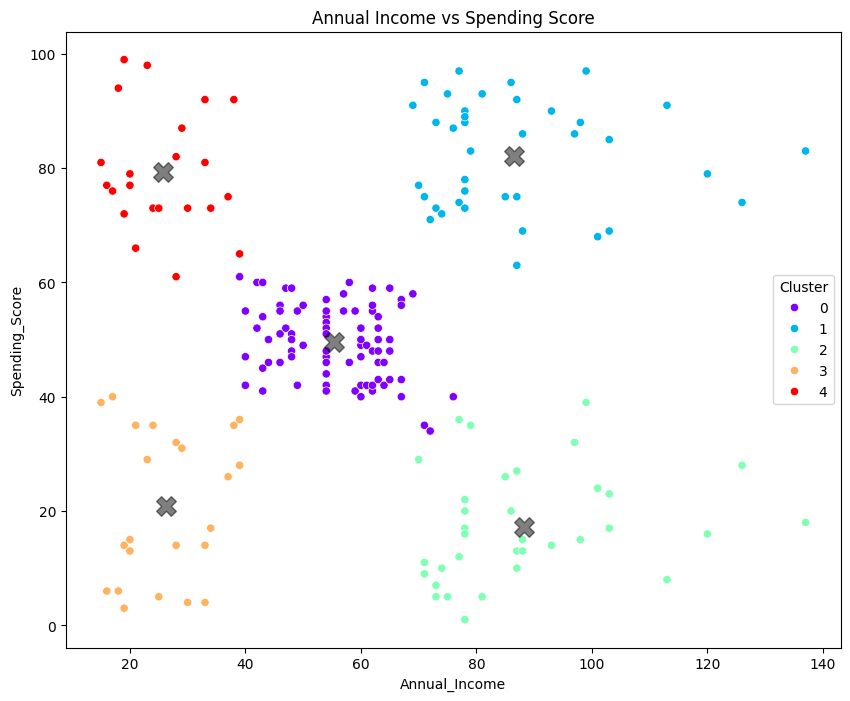

In [31]:
plt.figure(figsize=(10,8))
sns.scatterplot(df,x='Annual_Income',y='Spending_Score',hue='Cluster',palette='rainbow')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5,marker='X');
plt.title('Annual Income vs Spending Score')
plt.show()

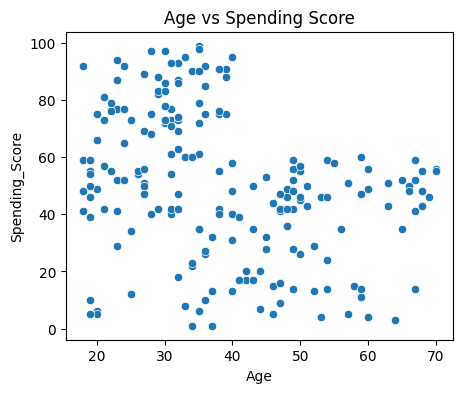

In [32]:
plt.figure(figsize=(5,4))
sns.scatterplot(df,x='Age',y='Spending_Score')
plt.title('Age vs Spending Score')
plt.show()

In [33]:
X=df[['Age','Spending_Score']]
wcss=[]

for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300, n_init=10, random_state=0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

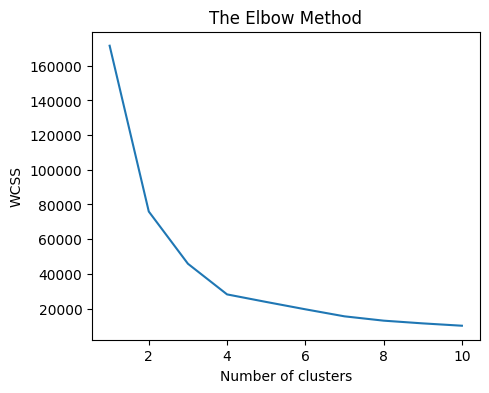

In [34]:
plt.figure(figsize=(5,4))
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [39]:
kmeans=KMeans(n_clusters=4,init='k-means++',max_iter=300, n_init=10, random_state=0)
y_kmeans=kmeans.fit_predict(X)

In [40]:
df['AgeCluster']=y_kmeans

In [41]:
df.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score,Cluster,AgeCluster
0,1,Male,19,15,39,3,3
1,2,Male,21,15,81,4,1
2,3,Female,20,16,6,3,2
3,4,Female,23,16,77,4,1
4,5,Female,31,17,40,3,3


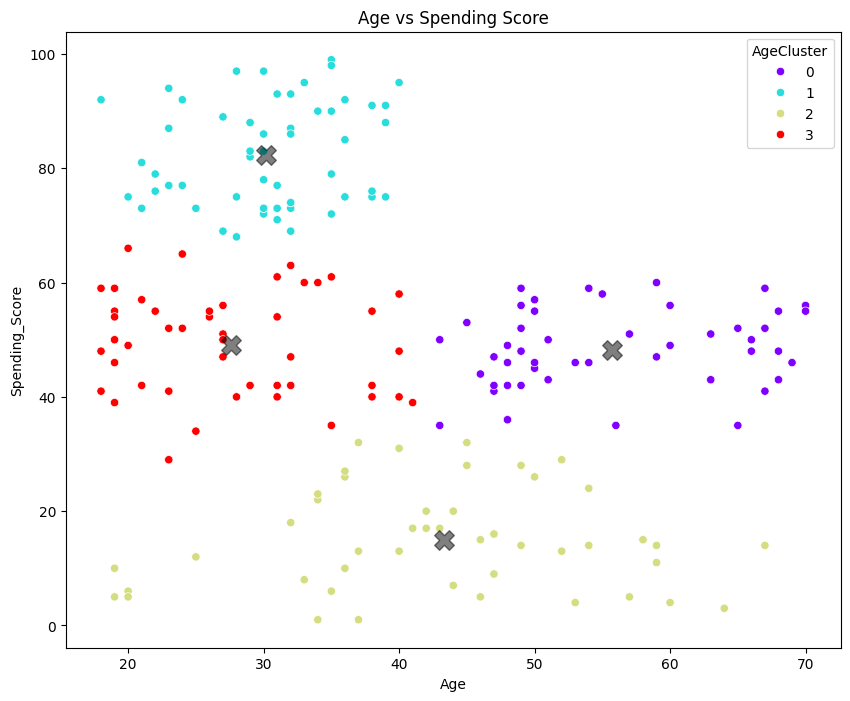

In [42]:
plt.figure(figsize=(10,8))
sns.scatterplot(df,x='Age',y='Spending_Score',hue='AgeCluster',palette='rainbow')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5,marker='X');
plt.title('Age vs Spending Score')
plt.show()

In [ ]:
#kmeans all three feature


In [43]:
X=df[['Age','Spending_Score','Annual_Income']]
wcss=[]

for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300, n_init=10, random_state=0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

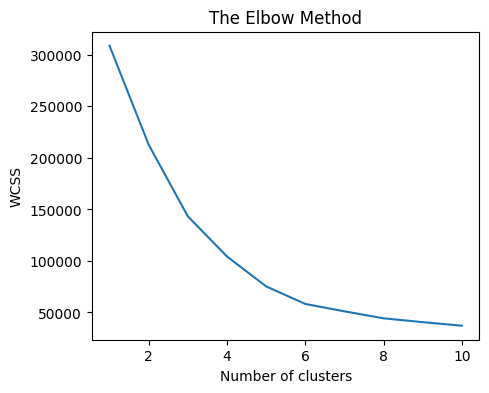

In [44]:
plt.figure(figsize=(5,4))
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [45]:
kmeans=KMeans(n_clusters=6,init='k-means++',max_iter=300, n_init=10, random_state=0)
y_kmeans=kmeans.fit_predict(X)

In [46]:
df['FinalCluster']=y_kmeans

In [47]:
df.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score,Cluster,AgeCluster,FinalCluster
0,1,Male,19,15,39,3,3,4
1,2,Male,21,15,81,4,1,5
2,3,Female,20,16,6,3,2,4
3,4,Female,23,16,77,4,1,5
4,5,Female,31,17,40,3,3,4


In [48]:
#visualizing cluster in 3D plot
import plotly.express as px
fig = px.scatter_3d(df, x='Annual_Income', y='Spending_Score', z='Age',
              color='FinalCluster')
fig.show()

Now as we have six clusters we can target new customers according to their group predicted by clustering model